In [3]:
import json
import pandas as pd

# Load the dataset
with open('updated_traffic_alerts.json', 'r') as f:
    traffic_data = json.load(f)

# Convert the traffic data into a pandas DataFrame for easy processing
traffic_df = []

# Flatten the nested structure of the data for easier analysis
for location, alerts in traffic_data.items():
    for alert in alerts:
        traffic_df.append({
            "location": location,
            "start_time": alert["startTime"],
            "latitude": alert["latitude"],
            "longitude": alert["longitude"],
            "alert_type": alert["type"],
            "subtype": alert["subtype"],
            "reliability": alert["reliability"],
            "road": alert["road"],
            "report_description": alert["reportDescription"]
        })

df = pd.DataFrame(traffic_df)

# Define the custom date format that matches the structure of the datetime string
date_format = "%Y-%m-%d %H:%M:%S:%f"

# Convert the 'start_time' column to datetime using the custom format
df['start_time'] = pd.to_datetime(df['start_time'], format=date_format, errors='coerce')

# Check if there are any invalid date values (NaT)
if df['start_time'].isnull().any():
    print("Some dates could not be converted to datetime format.")
else:
    print("All dates successfully converted.")

# Verify the conversion by printing the first few rows of the dataframe
print(df.head())


All dates successfully converted.
     location                 start_time   latitude  longitude   alert_type  \
0  Canal Road 2025-02-15 16:51:32.813531  31.492093  73.017689     Accident   
1  Canal Road 2025-02-10 16:18:35.851188  31.474403  73.096439     Accident   
2  Canal Road 2025-02-10 16:04:08.025822  31.480307  73.022255  Traffic Jam   
3  Canal Road 2025-02-25 06:10:20.211571  31.477003  73.080423  Traffic Jam   
4  Canal Road 2025-02-10 16:10:29.438416  31.471060  73.116243       Hazard   

    subtype  reliability          road                 report_description  
0     Heavy            3  Service Road  Random traffic alert description.  
1  Moderate            1     Main Road  Random traffic alert description.  
2     Heavy            3  Service Road  Random traffic alert description.  
3     Minor            2     Main Road  Random traffic alert description.  
4     Heavy            1     Main Road  Random traffic alert description.  


In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Get unique alert types and subtypes
print(df['alert_type'].unique())
print(df['subtype'].unique())


location              0
start_time            0
latitude              0
longitude             0
alert_type            0
subtype               0
reliability           0
road                  0
report_description    0
dtype: int64
location                      object
start_time            datetime64[ns]
latitude                     float64
longitude                    float64
alert_type                    object
subtype                       object
reliability                    int64
road                          object
report_description            object
dtype: object
['Accident' 'Traffic Jam' 'Hazard' 'Road Closure']
['Heavy' 'Moderate' 'Minor']


In [7]:
# Extract hour, day, and weekday
df['hour'] = df['start_time'].dt.hour
df['day'] = df['start_time'].dt.day
df['weekday'] = df['start_time'].dt.weekday  # Monday = 0, Sunday = 6

# Define whether it’s a weekend
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Preview the updated dataset
print(df[['location', 'hour', 'weekday', 'is_weekend']].head())


     location  hour  weekday  is_weekend
0  Canal Road    16        5           1
1  Canal Road    16        0           0
2  Canal Road    16        0           0
3  Canal Road     6        1           0
4  Canal Road    16        0           0


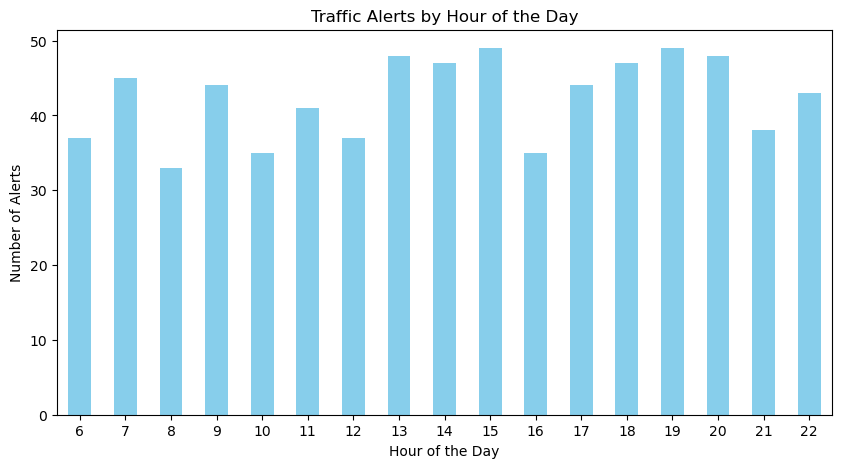

In [9]:
import matplotlib.pyplot as plt

# Group by hour to count alerts
hourly_traffic = df.groupby('hour').size()

# Plot the traffic pattern
plt.figure(figsize=(10, 5))
hourly_traffic.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Alerts')
plt.title('Traffic Alerts by Hour of the Day')
plt.xticks(rotation=0)
plt.show()


In [11]:
# Define rush hours
rush_hours = [7, 8, 9, 17, 18, 19]

# Get alerts happening during rush hours
rush_hour_traffic = df[df['hour'].isin(rush_hours)]

# Count alerts by location during rush hours
rush_location_count = rush_hour_traffic.groupby('location').size().reset_index(name='traffic_count')

# Sort locations by traffic count
print(rush_location_count.sort_values(by='traffic_count', ascending=False).head(10))


               location  traffic_count
0            Canal Road             67
3            Susan Road             66
2         Kohinoor City             65
1  Ghulam Muhammad Abad             64


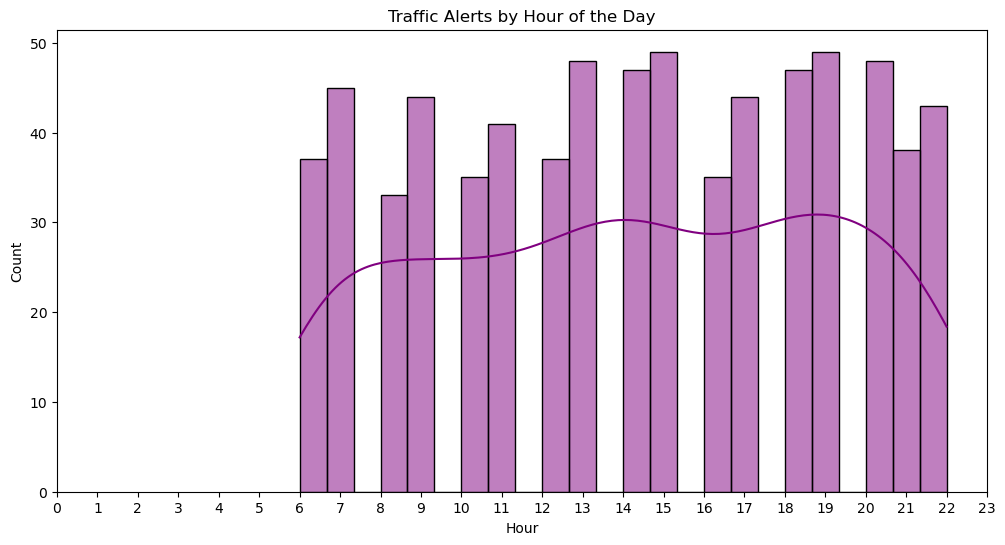

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hourly traffic trend
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, kde=True, color='purple')
plt.title("Traffic Alerts by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(range(0, 24))
plt.show()
